# TITANIC PROJECT MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Description

### Titanic Project
Problem Statement:

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

## Import Dataset

In [2]:
link = 'https://raw.githubusercontent.com/Bhushan0130/Datasets/main/titanic_train.csv'
df = pd.read_csv(link, index_col = 'PassengerId')
df.shape    # (891, 12)

# we can set PassengerID as index

(891, 11)

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head() # Top 5 rows

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.sample(4)   # 4 Sample of rows (randomly)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.50,B69,S
235,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.50,NaN,S
81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.00,NaN,S
91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.05,NaN,S


In [5]:
df.tail() # 5 Button rows

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Checking information about dataset

In [6]:
df.info()

# #   Column    Non-Null Count  Dtype  
# ---  ------    --------------  -----  
#  0   Survived  891 non-null    int64  
#  1   Pclass    891 non-null    int64  
#  2   Name      891 non-null    object 
#  3   Sex       891 non-null    object 
#  4   Age       714 non-null    float64
#  5   SibSp     891 non-null    int64  
#  6   Parch     891 non-null    int64  
#  7   Ticket    891 non-null    object 
#  8   Fare      891 non-null    float64
#  9   Cabin     204 non-null    object 
#  10  Embarked  889 non-null    object


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
df.dtypes

# Survived      int64
# Pclass        int64
# Name         object
# Sex          object
# Age         float64
# SibSp         int64
# Parch         int64
# Ticket       object
# Fare        float64
# Cabin        object
# Embarked     object

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

##  Null Value Analysis

In [8]:
df.isnull().sum()

# Survived         0
# Pclass           0
# Name             0
# Sex              0
# Age            177
# SibSp            0
# Parch            0
# Ticket           0
# Fare             0
# Cabin          687
# Embarked         2

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:ylabel='PassengerId'>

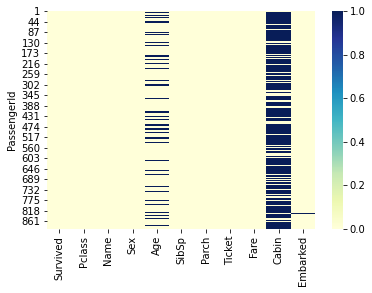

In [9]:
sns.heatmap(df.isnull(),cmap="YlGnBu" )

# only three calumns have null values
# Age have less null value as compare to cabin
# Embarked column have only 2 record null

In [10]:
null_value_per = df.isnull().sum() / df.shape[0] * 100  # Null value percentage
null_value_per

# Survived        0.000000
# Pclass          0.000000
# Name            0.000000
# Sex             0.000000
# Age            19.865320
# SibSp           0.000000
# Parch           0.000000
# Ticket          0.000000
# Fare            0.000000
# Cabin          77.104377
# Embarked        0.224467

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [11]:
null_value_per[null_value_per > 20]

# as we can observed cabin column containg 77.10 % null values, therefore its better to delete this column

# Cabin    77.104377
# dtype: float64

Cabin    77.104377
dtype: float64

In [12]:
# Age and Embarked column is also containing null values but that can filled by central tendency method 
# as they are in less percentage

In [13]:
print('Shape of df: ', df.shape)

Shape of df:  (891, 11)


#### Droping Cabin column because it is containg more than 75 % null value

In [14]:
df.drop(columns = 'Cabin', inplace = True)
df.shape

# (891, 10)

(891, 10)

<AxesSubplot:ylabel='PassengerId'>

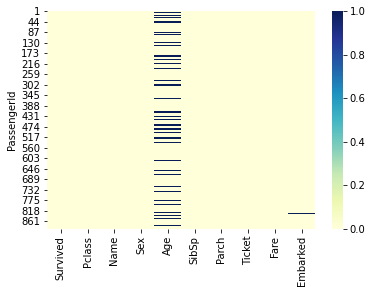

In [15]:
sns.heatmap(df.isnull(),cmap="YlGnBu" )

In [16]:
df.dtypes  # age column is showing null value and its data type is float64
            # Embarked column is showing null value and its data type is object
    
# Survived         int64
# Pclass           int64
# Name            object
# Sex             object
# Age            float64
# SibSp            int64
# Parch            int64
# Ticket          object
# Fare           float64
# Embarked        object

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

#### Imputation operation for Age column values

In [17]:
median_df = df.copy()   # created copy of df 

<AxesSubplot:xlabel='Age', ylabel='Density'>

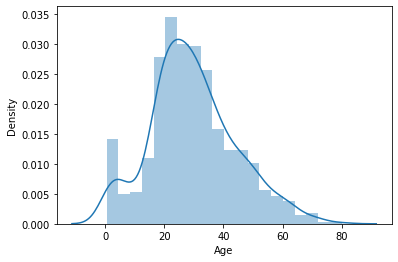

In [18]:
sns.distplot(df['Age'])  
# we can see age column is little big skewed, may be median imputation will work better here, let check 
# with both formats

##### 1. Testing median imputation  for Float type variable

In [19]:
median_df = df.copy()
median_df.isnull().sum().sum()

# 179

179

In [20]:
median_df['Age'].fillna(median_df['Age'].median(), inplace = True ) 

In [21]:
median_df.isnull().sum().sum()

#2

2

In [22]:
median_df.isnull().sum()    # Age  column null value has been removed 

# Survived    0
# Pclass      0
# Name        0
# Sex         0
# Age         0
# SibSp       0
# Parch       0
# Ticket      0
# Fare        0
# Embarked    2

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

#### 2.  Testing mean imputation  for Float type variable

In [23]:
mean_df = df.copy()   # Copy of dataframe
mean_df.isnull().sum().sum()   

# 179

179

In [24]:
mean_df['Age'].fillna(mean_df['Age'].mean(), inplace = True ) 

In [25]:
mean_df.isnull().sum().sum()

#2

2

In [26]:
mean_df.isnull().sum()     # Age null value has been replace with median value of that column

# Survived    0
# Pclass      0
# Name        0
# Sex         0
# Age         0
# SibSp       0
# Parch       0
# Ticket      0
# Fare        0
# Embarked    2

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

### Analysis of imputed values by mean and median method

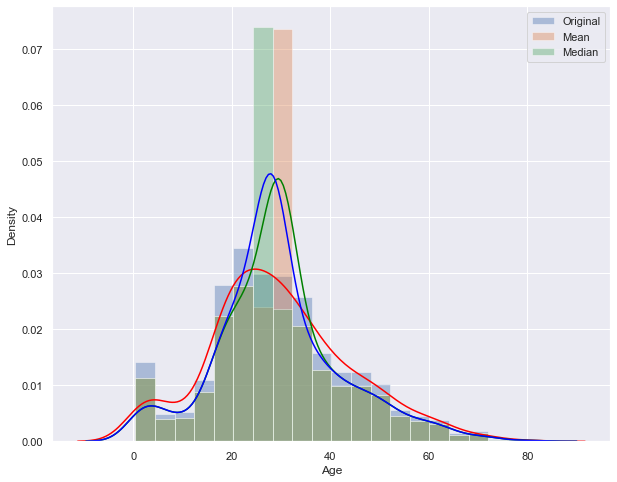

In [27]:
plt.figure(figsize = (10, 8))
sns.set()
   
sns.distplot(df['Age'], bins = 20, kde_kws = { 'color' : 'red' }, label = "Original")
sns.distplot(mean_df['Age'], bins = 20, kde_kws = {'color' : 'green' }, label = 'Mean')
sns.distplot(median_df['Age'], bins = 20, kde_kws = {'color' : 'blue' }, label = 'Median')
plt.legend()

In [28]:
# As we can observed both mean and median imputation are giving almost same impect on dataset
# Therefore, we choose any one of them,
# we consider median for age column null value imputation 

#### Applying to original Dataset

In [29]:
df['Age'].fillna(df['Age'].median(), inplace = True )
df.isnull().sum()

# Survived    0
# Pclass      0
# Name        0
# Sex         0
# Age         0
# SibSp       0
# Parch       0
# Ticket      0
# Fare        0
# Embarked    2

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

<AxesSubplot:ylabel='PassengerId'>

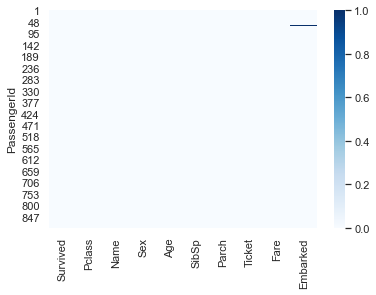

In [30]:
sns.heatmap(df.isnull(), cmap = 'Blues')

In [31]:
# Now, no null value present in age column
# only 2 value are null in Embarked column

#### Null value imputation for Categorical columns

In [32]:
df['Embarked'].value_counts()

# S    644
# C    168
# Q     77

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
df['Embarked'].mode()

# 0    S

0    S
dtype: object

In [34]:
# As per description, embarked column is indicating where passenger mounted from.
# Hence, there is no related of embarked column with other variables
# Therefore, we can apply directly mode to the null value

In [35]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True )
df.isnull().sum()


# Survived       0
# Pclass         0
# Name           0
# Sex            0
# Age            0
# SibSp          0
# Parch          0
# Ticket         0
# Fare           0
# Embarked       0

# Embarked null value has been replaced with Mode of Embarked column ( S )

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [36]:
df['Embarked'].value_counts()

# S    646  #  2 value has been increased as two null values are replaced with mode of embarked columns
# C    168
# Q     77

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
df.isnull().sum().sum()  # Now, no null value present in our dataset 

# 0

0

<AxesSubplot:ylabel='PassengerId'>

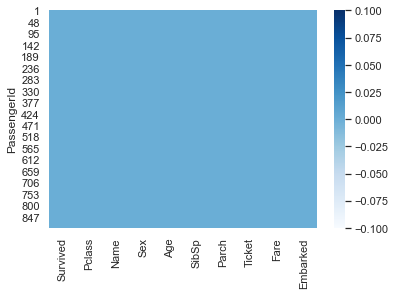

In [38]:
sns.heatmap(df.isnull(), cmap = 'Blues')  # No null value present

## Data Preprocessing

In [39]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [40]:
df.Embarked.unique()

# array(['S', 'C', 'Q'], dtype=object)

array(['S', 'C', 'Q'], dtype=object)

In [41]:
# As i have done study on this data and i get to know, these below mentioned information 
# S: Southampton
# C: Cherbourg
# Q: Queenstown

# Now, we will implement his into dataset

In [42]:
df['Embarked']  = df['Embarked'].replace({ 'S' : 'Southampton', 'C': 'Cherbourg', 'Q': 'Queentown'})

In [43]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


In [44]:
# Name and Ticket columns are not contributing anything to Survived variable therefore, We should remove this for training 
# the model

### Droping Uneccesary columns

In [45]:
# survival - Survival (0 = No; 1 = Yes)
# class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# name - Name
# sex - Sex
# age - Age
# sibsp - Number of Siblings/Spouses Aboard
# parch - Number of Parents/Children Aboard
# ticket - Ticket Number
# fare - Passenger Fare
# cabin - Cabin

drop_col = ['Name', 'Ticket']
df.drop(columns = drop_col, inplace =  True)

In [46]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,Southampton
2,1,1,female,38.0,1,0,71.2833,Cherbourg
3,1,3,female,26.0,0,0,7.9250,Southampton
4,1,1,female,35.0,1,0,53.1000,Southampton
5,0,3,male,35.0,0,0,8.0500,Southampton


In [47]:
df.shape

# (891, 8)

(891, 8)

## Visualization

### Checking Balancy of data

In [48]:
df.Survived.value_counts()

# 0    549
# 1    342

0    549
1    342
Name: Survived, dtype: int64

In [49]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [50]:
# As we have stuty about this study and found Pclass, Sex, SibSp, Parch and Embarked columns are categorical columns

In [51]:
cat_var = df.select_dtypes(include = ['int64','object']).keys()
cat_var

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

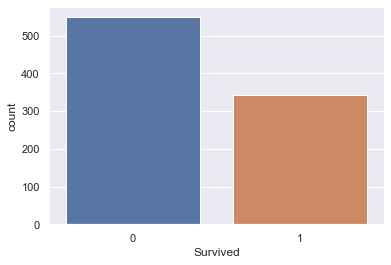

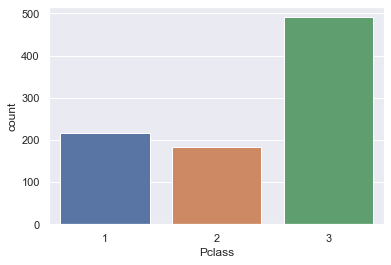

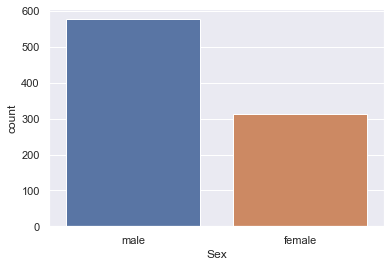

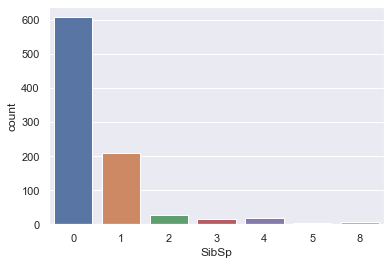

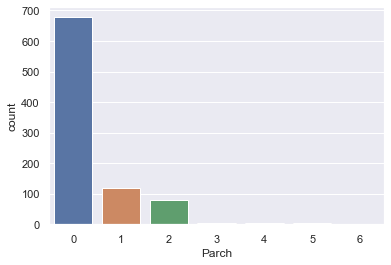

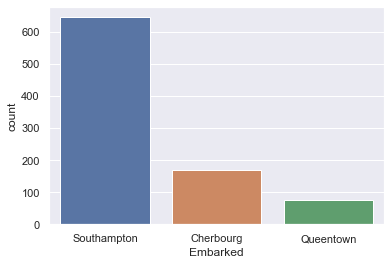

In [52]:
for i in cat_var:
    plt.figure()
    sns.countplot(df[i])

In [53]:
for i in cat_var:
    print(i, 'Column')
    print(df[i].value_counts())
    print('\n')

Survived Column
0    549
1    342
Name: Survived, dtype: int64


Pclass Column
3    491
1    216
2    184
Name: Pclass, dtype: int64


Sex Column
male      577
female    314
Name: Sex, dtype: int64


SibSp Column
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


Parch Column
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


Embarked Column
Southampton    646
Cherbourg      168
Queentown       77
Name: Embarked, dtype: int64




In [54]:
# Target variable Survied column is not balanced, need to perform balancing technique to balance this data
# Maximum person was embarked from Southampton (646) and least from Queentown (77)
# Maximum person was male (577) in that boat
# maximum seat was booked in 3rd(291) class and least in 2nd (184) class
# maximum person (549) was died in that accident

<AxesSubplot:ylabel='Survived'>

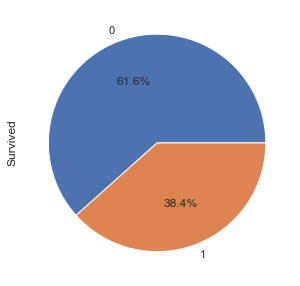

In [55]:
plt.figure(figsize = (8, 5))
df['Survived'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

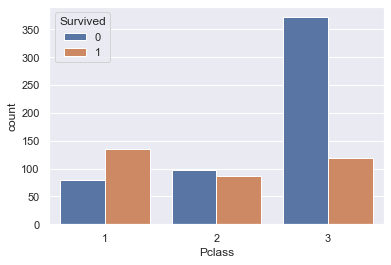

In [56]:
sns.countplot(df['Pclass'], hue = df['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

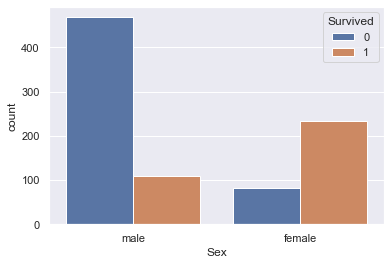

In [57]:
sns.countplot(df['Sex'], hue = df['Survived'])

In [58]:
# As we can see, maximum male were died in that accident

#### Analyse Survived rate as per gender

In [59]:
df_copy = df.copy() 
# copy of df data

In [60]:
male_df = df_copy[df_copy['Sex'] == 'male'  ]
female_df = df_copy[df_copy['Sex'] == 'female']

<AxesSubplot:title={'center':'Male'}, ylabel='Survived'>

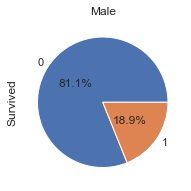

In [61]:
plt.figure(figsize = (5,3))
plt.title('Male')
male_df['Survived'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', pctdistance = 0.5)

In [62]:
# 81.1 % male was died in that accident only 18.9 % was saved

<AxesSubplot:title={'center':'Female'}, ylabel='Survived'>

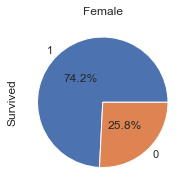

In [63]:
plt.figure(figsize = (5,3))
plt.title('Female')
female_df['Survived'].value_counts().plot(kind = 'pie', autopct = '%.1f%%', pctdistance = 0.5)

In [64]:
# In that accident, maximum female was saved, as give above, 74.2 % was saved and 25.8% was died

<AxesSubplot:xlabel='Embarked', ylabel='count'>

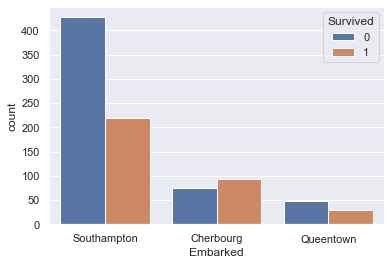

In [65]:
sns.countplot(df['Embarked'], hue = df['Survived'])

In [66]:
# Maximum people was saved who embarked from southampton
# least people was saved who embarked from Queentown

## Outliers Analysis

In [67]:
float_var = df.select_dtypes(include = ['float']).keys()
float_var

Index(['Age', 'Fare'], dtype='object')

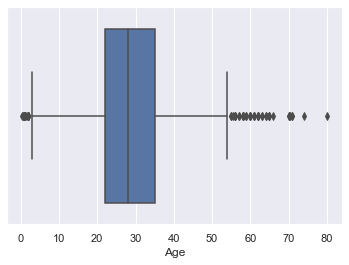

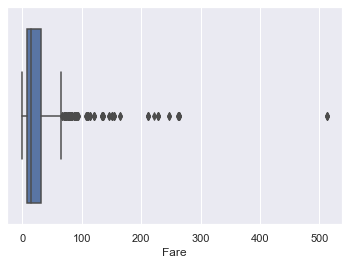

In [68]:
for i in float_var:
    plt.figure()
    sns.boxplot(df[i])
    
    # as we can observed, many outliers are present in this dataset, 
    # need to work on it

## Skewness Analysis

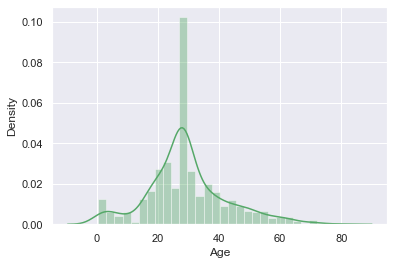

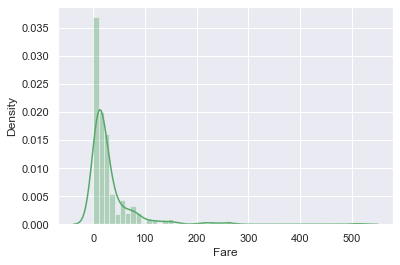

In [69]:
for i in float_var:
    plt.figure()
    sns.distplot(df[i], color = 'g')

In [70]:
   # age column is almost non skewed column
    # but Fare column is showing  skewness

## Checking the distribution

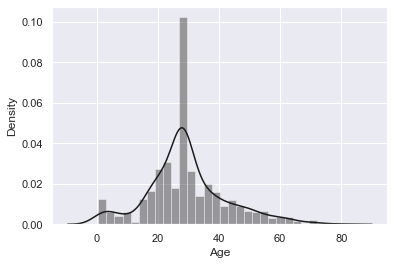

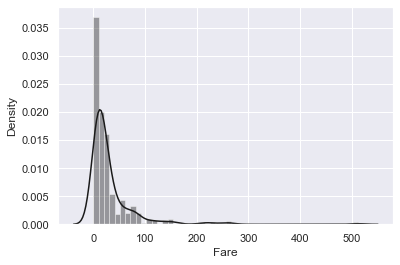

In [71]:
for i in float_var:
    plt.figure()
    sns.distplot(df[i], kde = True, color = 'k')

In [72]:
   # age column is almost normally distributed
    # but Fare column is showing little bit non- normally discribution

## Spread of Columns

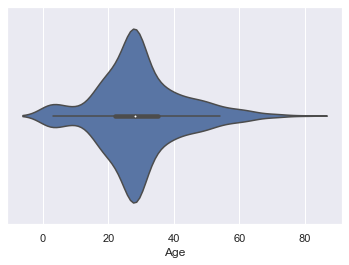

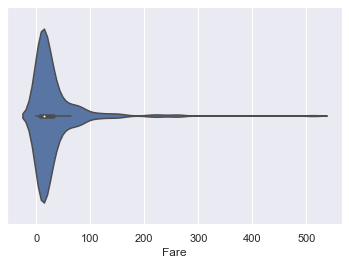

In [73]:
for i in float_var:    
    plt.figure()
    sns.violinplot(df[i], orient = 'vertical')

## Checking pattern of data

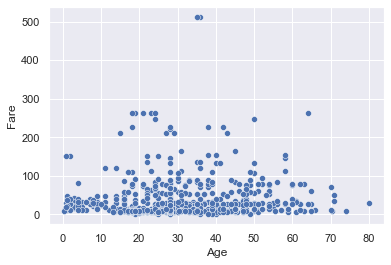

In [74]:
for i in range(len(float_var)):

    for j in float_var[i+1:]:    
        plt.figure()
        sns.scatterplot(df[float_var[i]], df[j])
        

In [75]:
# age and fare are not showing any pattern

In [76]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

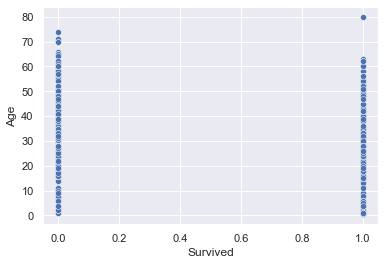

In [77]:
sns.scatterplot(df['Survived'], df['Age'])

In [78]:
# We can we see, there was only person who was 80 years old and he was saved
# people who were in age of 75 to 85 approx, were not survived

## Correlation of the columns

In [79]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


<AxesSubplot:>

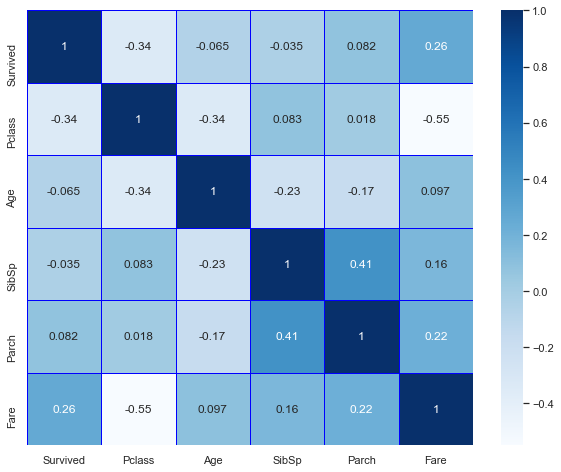

In [80]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 


In [81]:
# Parch and SibSp column is showing highest correlation

## Describe data

In [82]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

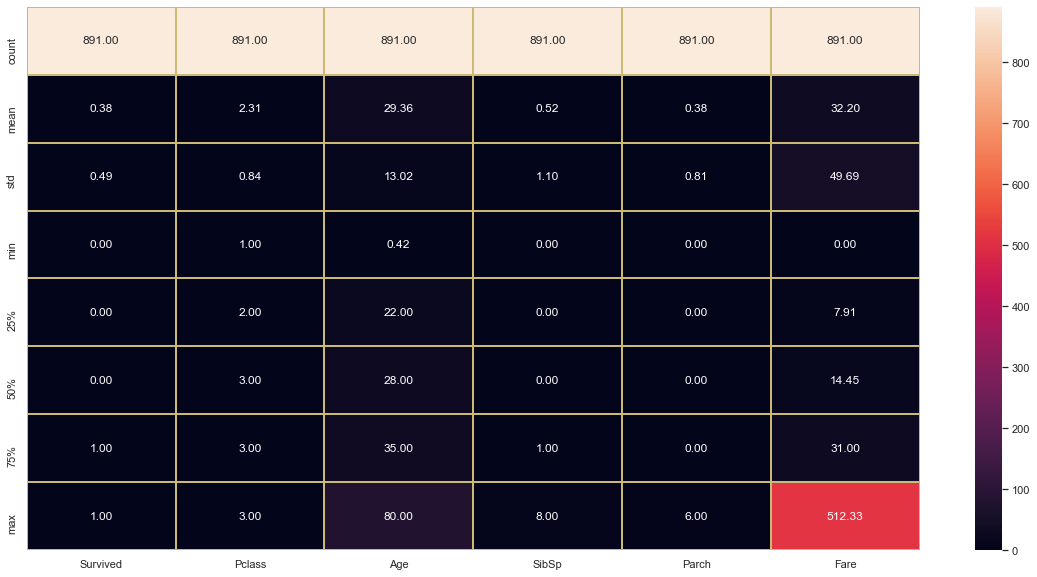

In [83]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.describe(), annot = True, linewidth = 0.05, linecolor = 'y', fmt = "0.2f")

In [84]:
# As age column is showing 29.361582 mean value and its 50 percentile is 28, which indicate skewness
# in fare columns, difference between mean and 50 percentile is so high, which indicates high skewness and presence of outliers

## Checking the columns which are contributing to target positively or negatively

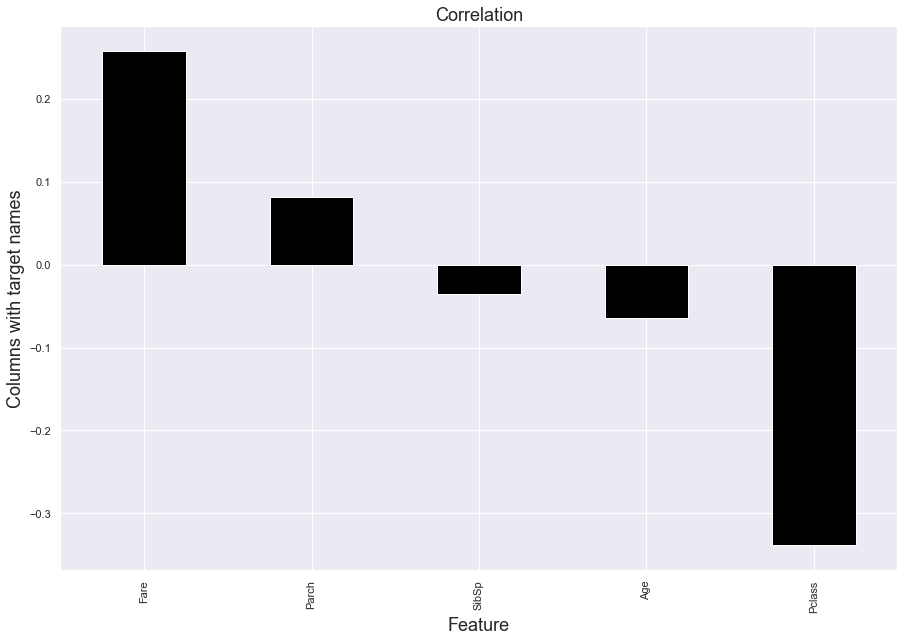

In [85]:
plt.figure(figsize = (15, 10))
df.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [86]:
# fare column is positvely contributing towards target wherease age is negatively contributing towards age 

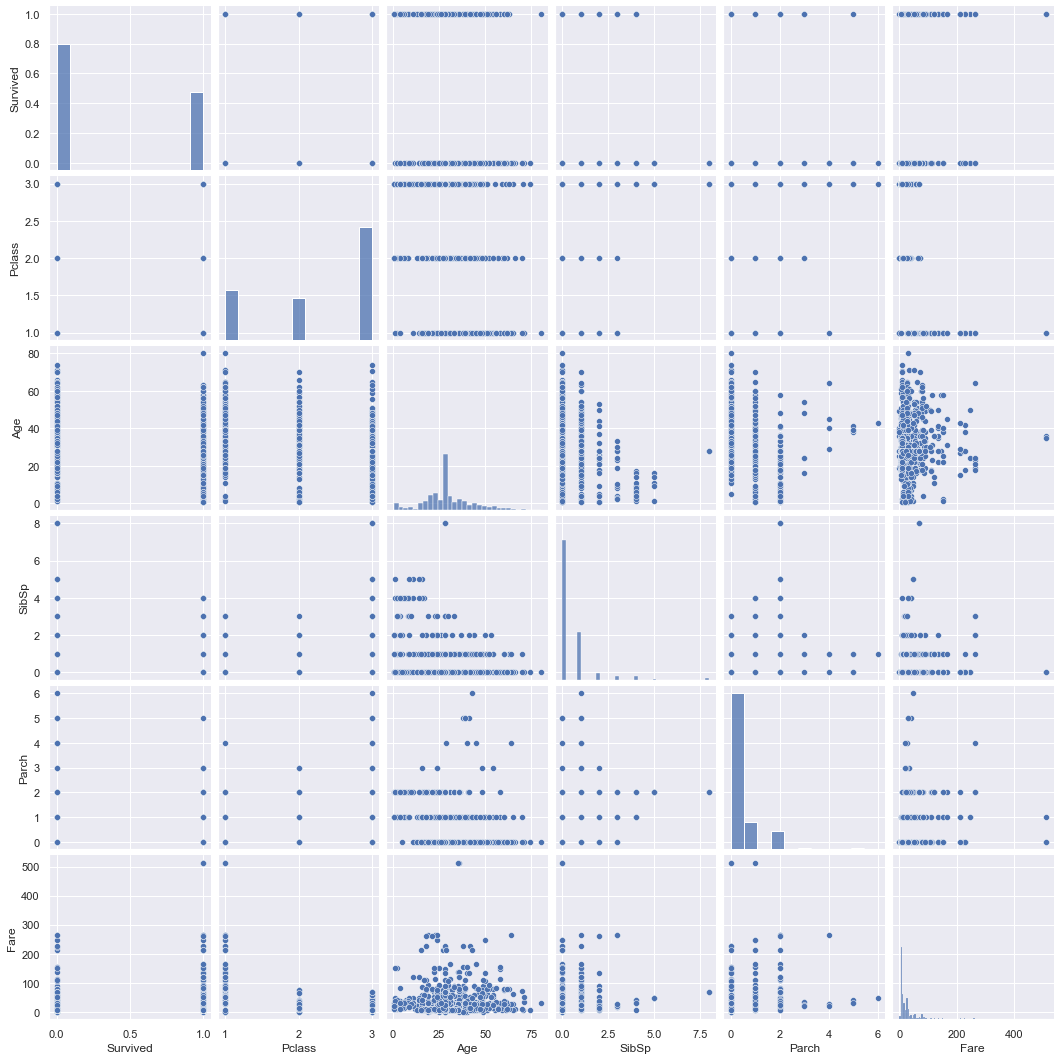

In [87]:
sns.pairplot(df)

In [88]:
df[df['Fare'] < 1]['Fare'].value_counts()
# 15 people were present in the titanic, who had not paid any fare
# may be they were worker

0.0    15
Name: Fare, dtype: int64

In [89]:
df[df['Fare'] < 1]['Survived'].value_counts()  # only one person was saved from those people who had not paid any fare

0    14
1     1
Name: Survived, dtype: int64

In [90]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,Southampton
2,1,1,female,38.0,1,0,71.2833,Cherbourg
3,1,3,female,26.0,0,0,7.9250,Southampton
4,1,1,female,35.0,1,0,53.1000,Southampton
5,0,3,male,35.0,0,0,8.0500,Southampton


## Encoding 

In [91]:
df.dtypes  

# Survived      int64
# Pclass        int64
# Sex          object
# Age         float64
# SibSp         int64
# Parch         int64
# Fare        float64
# Embarked     object

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [92]:
obj_col = df.select_dtypes(include = ['object', 'int']).keys()
obj_col

# Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [93]:
for i in obj_col:
    print(i, 'Column')
    print(df[i].value_counts())
    print('\n')
    
# we will apply onehotencoding only to those columns which are containing less unique value to avoid lot of columns creation
# Giving unique values of categorical columns

Survived Column
0    549
1    342
Name: Survived, dtype: int64


Pclass Column
3    491
1    216
2    184
Name: Pclass, dtype: int64


Sex Column
male      577
female    314
Name: Sex, dtype: int64


SibSp Column
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


Parch Column
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


Embarked Column
Southampton    646
Cherbourg      168
Queentown       77
Name: Embarked, dtype: int64




### OneHotEncoder

In [94]:
# We will apply OnehotEncoding here to maximum accuracy
# Therefore, i decided to apply onehotencoder only to few columns which are showing less unique values

In [95]:
df = pd.get_dummies(df, columns = ['Sex','Embarked', 'Pclass'])
df.shape

(891, 13)

In [96]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queentown,Embarked_Southampton,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
5,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [97]:
df.dtypes

# Survived                  int64
# Age                     float64
# SibSp                     int64
# Parch                     int64
# Fare                    float64
# Sex_female                uint8
# Sex_male                  uint8
# Embarked_Cherbourg        uint8
# Embarked_Queentown        uint8
# Embarked_Southampton      uint8
# Pclass_1                  uint8
# Pclass_2                  uint8
# Pclass_3                  uint8

Survived                  int64
Age                     float64
SibSp                     int64
Parch                     int64
Fare                    float64
Sex_female                uint8
Sex_male                  uint8
Embarked_Cherbourg        uint8
Embarked_Queentown        uint8
Embarked_Southampton      uint8
Pclass_1                  uint8
Pclass_2                  uint8
Pclass_3                  uint8
dtype: object

## Outliers removing techniques

#### 1. Try zscore technique

In [98]:
from scipy.stats import zscore

In [99]:
z = np.abs(zscore(df))
df_z = df[(z < 3.10).all(axis = 1)] 
df_z.shape

(749, 13)

In [100]:
# data loss percentage
(df.shape[0] - df_z.shape[0])/df.shape[0] * 100  

# 15.937149270482603  
# we are lossing so much data, by using zscore

15.937149270482603

#### Try IQR technique

In [101]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 

In [102]:
df_IQR = df[~((df < (Q1 - 1.5*IQR) ) | (df > (Q3 + 1.5*IQR) )).any(axis = 1) ] 
df_IQR.shape  # (5419, 11)

(264, 13)

In [103]:
(df.shape[0] - df_IQR.shape[0])/df.shape[0] * 100 

# 70.37037037037037  

# we are getting so high loss of data by using IQR techniques 

70.37037037037037

In [104]:
# As both method zscore and IQR giving high loss of data , therefore we will leave data as it is
# Do not perform any of tecniques on dataset as they are giving high loss data

In [105]:
df.shape

(891, 13)

## Seperating dataset into x and y form

In [106]:
x = df.drop(columns= ['Survived'])
y = df['Survived']

print('shape of test', x.shape)
print('shape of y', y.shape)

# shape of test (891, 12)
# shape of y (891,)

shape of test (891, 12)
shape of y (891,)


In [107]:
x.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queentown,Embarked_Southampton,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
1,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
2,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
4,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
5,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


## Data Balancing Work

<AxesSubplot:xlabel='Survived', ylabel='count'>

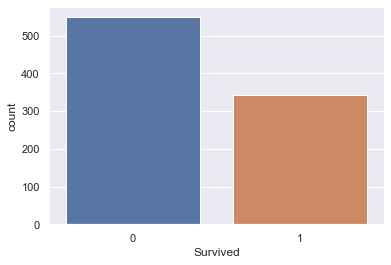

In [108]:
sns.countplot(y)

In [109]:
y.value_counts()  

# 0    549
# 1    342

0    549
1    342
Name: Survived, dtype: int64

In [110]:
# As we can see, data is imbalanced we need to apply Balancing Technique 

### SMOTE (Synthetic Minority Over-Sampling Technique)

In [111]:
from imblearn.over_sampling import SMOTE

In [112]:
smt = SMOTE()  # Instance of SMOTE
x, y = smt.fit_resample(x, y)

<AxesSubplot:xlabel='Survived', ylabel='count'>

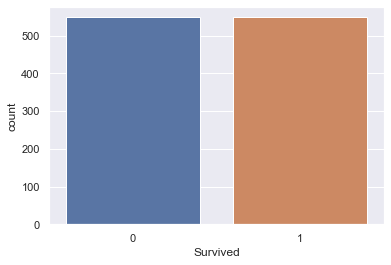

In [113]:
sns.countplot(y)

In [114]:
print('Shape of x: ', x.shape)
print('Shape of x: ', y.shape)

# Shape of x:  (1098, 12)
# Shape of x:  (1098,)

Shape of x:  (1098, 12)
Shape of x:  (1098,)


## Remvoing Skewness

In [115]:
x.skew()

# we have to check skewness only for two columns Age and fare
# Skew value of age column is in acceptable range
# skew value of Fare column is higly skewed ( 4.787317)

# only fare column is showing skewd value which is not in acceptable range

Age                     0.459319
SibSp                   3.866950
Parch                   2.840465
Fare                    4.624776
Sex_female              0.476210
Sex_male               -0.179467
Embarked_Cherbourg      1.731006
Embarked_Queentown      3.074264
Embarked_Southampton   -0.760975
Pclass_1                1.103820
Pclass_2                1.513500
Pclass_3               -0.025538
dtype: float64

In [116]:
# Applied Log transformation technique to the Fare column to remove skewness from this column
x['Fare'] = np.log(1 + x['Fare'])

In [117]:
x.skew()

# Now, the skew value of Fare column is 0.39 approx which is acceptable 
# all value of Skewness are in acceptable range

Age                     0.459319
SibSp                   3.866950
Parch                   2.840465
Fare                    0.407371
Sex_female              0.476210
Sex_male               -0.179467
Embarked_Cherbourg      1.731006
Embarked_Queentown      3.074264
Embarked_Southampton   -0.760975
Pclass_1                1.103820
Pclass_2                1.513500
Pclass_3               -0.025538
dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

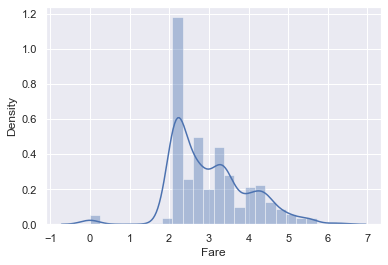

In [118]:
sns.distplot(x['Fare'])   # Operation has been applied to fare column by log transfromation method

# Now, this columns is not showing high skewness

## Multicolinearity checking

#### Using VIF (variance inflation factor)

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
# function to calculate VIF
def cal_vif(data):   
    vif = pd.DataFrame()
    vif['Columns Name'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return (vif)

In [121]:
cal_vif(x)

,Columns Name,VIF
0,Age,6.850745
1,SibSp,1.704621
2,Parch,1.669386
3,Fare,19.849596
4,Sex_female,7.835736
5,Sex_male,11.786764
6,Embarked_Cherbourg,3.754359
7,Embarked_Queentown,2.370589
8,Embarked_Southampton,11.509520
9,Pclass_1,10.041605


In [122]:
# All columns VIF values are under acceptable range

# Columns Name	VIF
# 0	Age	1.221644
# 1	SibSp	1.477940
# 2	Parch	1.416932
# 3	Fare	2.953110

## Applying Standard Scalling

In [123]:
x.head(2)

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queentown,Embarked_Southampton,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,2.110213,0,1,0,0,1,0,0,1
1,38.0,1,0,4.280593,1,0,1,0,0,1,0,0


In [124]:
from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()

In [125]:
# x_scal = ss.fit_transform(x)

In [126]:
# x = pd.DataFrame(x_scal, columns = x.columns)
# x.shape

In [127]:
x.dtypes

Age                     float64
SibSp                     int64
Parch                     int64
Fare                    float64
Sex_female                uint8
Sex_male                  uint8
Embarked_Cherbourg        uint8
Embarked_Queentown        uint8
Embarked_Southampton      uint8
Pclass_1                  uint8
Pclass_2                  uint8
Pclass_3                  uint8
dtype: object

In [128]:
ss_features = x.select_dtypes(include=['int64', 'float64']).keys()
ss_scaler = StandardScaler()
# x_ss = pd.DataFrame(data = x)
x[ss_features] = ss_scaler.fit_transform(x[ss_features])

In [129]:
x.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queentown,Embarked_Southampton,Pclass_1,Pclass_2,Pclass_3
0,-0.546672,0.504538,-0.46435,-0.939027,0,1,0,0,1,0,0,1
1,0.667834,0.504538,-0.46435,1.297648,1,0,1,0,0,1,0,0
2,-0.243046,-0.472504,-0.46435,-0.857981,1,0,0,0,1,0,0,1
3,0.440114,0.504538,-0.46435,0.999038,1,0,0,0,1,1,0,0
4,0.440114,-0.472504,-0.46435,-0.843648,0,1,0,0,1,0,0,1


In [130]:
x.dtypes

Age                     float64
SibSp                   float64
Parch                   float64
Fare                    float64
Sex_female                uint8
Sex_male                  uint8
Embarked_Cherbourg        uint8
Embarked_Queentown        uint8
Embarked_Southampton      uint8
Pclass_1                  uint8
Pclass_2                  uint8
Pclass_3                  uint8
dtype: object

## Machine Learning

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

### 1. LogisticRegression

In [132]:
best_fit1 = []
for i in range(0, 150 ) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model1 = LogisticRegression()
    model1.fit(x_train, y_train)
    model1_predict_train = model1.predict(x_train)
    model1_predict_test = model1.predict(x_test)
    training1 = accuracy_score(model1_predict_train, y_train)
    testing1 = accuracy_score(model1_predict_test, y_test)
#     print('At random state', i, 'the training accuracy is :-', training1 )
#     print('At random state', i, 'the testing accuracy is :-',testing1 ) 
#     print('\n')
    if round(training1, 2) == round(testing1, 2):
        best_fit1.append(i)

In [133]:
for i in best_fit1 :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model1 = LogisticRegression()
    model1.fit(x_train, y_train)
    model1_predict_train = model1.predict(x_train)
    model1_predict_test = model1.predict(x_test)
    training1 = accuracy_score(model1_predict_train, y_train)
    testing1 = accuracy_score(model1_predict_test, y_test)
    print('At random state', i, 'the training accuracy is :-', training1 )
    print('At random state', i, 'the testing accuracy is :-',testing1 ) 
    print('\n')
#     if round(training1, 2) == round(testing1, 2):
#         best_fit1.append(i)

At random state 2 the training accuracy is :- 0.81640625
At random state 2 the testing accuracy is :- 0.8181818181818182


At random state 3 the training accuracy is :- 0.8190104166666666
At random state 3 the testing accuracy is :- 0.8151515151515152


At random state 21 the training accuracy is :- 0.8177083333333334
At random state 21 the testing accuracy is :- 0.8212121212121212


At random state 27 the training accuracy is :- 0.81640625
At random state 27 the testing accuracy is :- 0.8151515151515152


At random state 36 the training accuracy is :- 0.8151041666666666
At random state 36 the testing accuracy is :- 0.8242424242424242


At random state 41 the training accuracy is :- 0.82421875
At random state 41 the testing accuracy is :- 0.8181818181818182


At random state 42 the training accuracy is :- 0.8190104166666666
At random state 42 the testing accuracy is :- 0.8212121212121212


At random state 47 the training accuracy is :- 0.8203125
At random state 47 the testing accuracy 

In [134]:
# as we can see in above cell model is giving best fit at random state 12, where accuracy of traing is almost equal
# accuracy of testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 12)
lg = LogisticRegression()
lg.fit(x_train, y_train)
lg_pred = lg.predict(x_test)
lg_pred_train = lg.predict(x_train)

Train_accuracy1 = accuracy_score(lg_pred_train, y_train)
Test_accuracy1 = accuracy_score(lg_pred, y_test)
print('Training accuracy: ', Train_accuracy1)
print('Testing accuracy: ', Test_accuracy1)
print('______________________________________________')
print('Classification report:\n ', classification_report(lg_pred, y_test))
print('Confusion Matrix: \n', confusion_matrix(lg_pred, y_test))

Training accuracy:  0.8229166666666666
Testing accuracy:  0.796969696969697
______________________________________________
Classification report:
                precision    recall  f1-score   support

           0       0.81      0.78      0.80       168
           1       0.78      0.81      0.80       162

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330

Confusion Matrix: 
 [[131  37]
 [ 30 132]]


#### Cross Validation for LogisticRegression

In [135]:
for fold in range(2, 8):
    cv = cross_val_score(lg, x, y, cv = fold).mean()
    print('cv:', cv, ' at fold value', fold)

cv: 0.7932604735883424  at fold value 2
cv: 0.8078324225865209  at fold value 3
cv: 0.8115627073656271  at fold value 4
cv: 0.8097799916977999  at fold value 5
cv: 0.8123861566484517  at fold value 6
cv: 0.8124343809057185  at fold value 7


In [136]:
# As we can see, cv is giving maximum value at fold 4

## DecisionTreeClassifier

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
best_fit2 = []
for i in range(0, 200 ) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model2 = DecisionTreeClassifier()
    model2.fit(x_train, y_train)
    model2_predict_train = model2.predict(x_train)
    model2_predict_test = model2.predict(x_test)
    training2 =  accuracy_score(model2_predict_train, y_train)
    testing2 = accuracy_score(model2_predict_test, y_test)
    
    print('At random state', i, 'the training accuracy is :-', training2)
    print('At random state', i, 'the testing accuracy is :-', testing2) 
    print('\n')
    
    if round(training2, 2) == round(testing2, 2):
        best_fit2.append(i)

At random state 0 the training accuracy is :- 0.9869791666666666
At random state 0 the testing accuracy is :- 0.803030303030303


At random state 1 the training accuracy is :- 0.9895833333333334
At random state 1 the testing accuracy is :- 0.7878787878787878


At random state 2 the training accuracy is :- 0.9869791666666666
At random state 2 the testing accuracy is :- 0.8121212121212121


At random state 3 the training accuracy is :- 0.9869791666666666
At random state 3 the testing accuracy is :- 0.7757575757575758


At random state 4 the training accuracy is :- 0.9869791666666666
At random state 4 the testing accuracy is :- 0.8363636363636363


At random state 5 the training accuracy is :- 0.9830729166666666
At random state 5 the testing accuracy is :- 0.8090909090909091


At random state 6 the training accuracy is :- 0.9895833333333334
At random state 6 the testing accuracy is :- 0.8484848484848485


At random state 7 the training accuracy is :- 0.9856770833333334
At random state 7 t

At random state 69 the training accuracy is :- 0.9856770833333334
At random state 69 the testing accuracy is :- 0.8121212121212121


At random state 70 the training accuracy is :- 0.98828125
At random state 70 the testing accuracy is :- 0.7757575757575758


At random state 71 the training accuracy is :- 0.9921875
At random state 71 the testing accuracy is :- 0.7787878787878788


At random state 72 the training accuracy is :- 0.9856770833333334
At random state 72 the testing accuracy is :- 0.8181818181818182


At random state 73 the training accuracy is :- 0.984375
At random state 73 the testing accuracy is :- 0.8272727272727273


At random state 74 the training accuracy is :- 0.9856770833333334
At random state 74 the testing accuracy is :- 0.8272727272727273


At random state 75 the training accuracy is :- 0.9856770833333334
At random state 75 the testing accuracy is :- 0.803030303030303


At random state 76 the training accuracy is :- 0.9856770833333334
At random state 76 the testing 

At random state 139 the training accuracy is :- 0.9895833333333334
At random state 139 the testing accuracy is :- 0.8484848484848485


At random state 140 the training accuracy is :- 0.9895833333333334
At random state 140 the testing accuracy is :- 0.8242424242424242


At random state 141 the training accuracy is :- 0.9830729166666666
At random state 141 the testing accuracy is :- 0.8


At random state 142 the training accuracy is :- 0.9895833333333334
At random state 142 the testing accuracy is :- 0.7848484848484848


At random state 143 the training accuracy is :- 0.9856770833333334
At random state 143 the testing accuracy is :- 0.806060606060606


At random state 144 the training accuracy is :- 0.9895833333333334
At random state 144 the testing accuracy is :- 0.8333333333333334


At random state 145 the training accuracy is :- 0.9856770833333334
At random state 145 the testing accuracy is :- 0.7909090909090909


At random state 146 the training accuracy is :- 0.9895833333333334
At r

In [139]:
best_fit2  

[]

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 25)
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)
dtc_pred_train = dtc.predict(x_train)

Train_accuracy = accuracy_score(dtc_pred_train, y_train)
Test_accuracy = accuracy_score(dtc_pred, y_test)
print('Training accuracy: ', Train_accuracy)
print('Testing accuracy: ', Test_accuracy)
print('______________________________________________')
print('Classification report:\n ', classification_report(dtc_pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(dtc_pred, y_test))

Training accuracy:  0.9830729166666666
Testing accuracy:  0.793939393939394
______________________________________________
Classification report:
                precision    recall  f1-score   support

           0       0.77      0.82      0.80       163
           1       0.82      0.77      0.79       167

    accuracy                           0.79       330
   macro avg       0.79      0.79      0.79       330
weighted avg       0.80      0.79      0.79       330

Confusion Matrix:
  [[134  29]
 [ 39 128]]


In [141]:
# Giving overfitted model at every random state
# This model is giving training accuracy higher than testing accuracy 
# (train accuracy > test accuracy)  :- Overfitted model
# Best fit is empty thefore, we can say decisiontreeclassifier is giving overfitting model
# therefore, Need not to work more on this algorithm

## SVC

In [142]:
from sklearn.svm import SVC

In [143]:
best_fit3 = []
for i in range(0, 150 ) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model3 = SVC()
    model3.fit(x_train, y_train)
    model3_predict_train = model3.predict(x_train)
    model3_predict_test = model3.predict(x_test)
    training3 = accuracy_score(model3_predict_train, y_train)
    testing3 = accuracy_score(model3_predict_test, y_test)
    print('At random state', i, 'the training accuracy is :-', training3 )
    print('At random state', i, 'the testing accuracy is :-',testing3 ) 
    print('\n')
    if round(training3, 2) == round(testing3, 2):
        best_fit3.append(i)

At random state 0 the training accuracy is :- 0.8515625
At random state 0 the testing accuracy is :- 0.8393939393939394


At random state 1 the training accuracy is :- 0.86328125
At random state 1 the testing accuracy is :- 0.8151515151515152


At random state 2 the training accuracy is :- 0.8541666666666666
At random state 2 the testing accuracy is :- 0.8424242424242424


At random state 3 the training accuracy is :- 0.84765625
At random state 3 the testing accuracy is :- 0.8303030303030303


At random state 4 the training accuracy is :- 0.8489583333333334
At random state 4 the testing accuracy is :- 0.8424242424242424


At random state 5 the training accuracy is :- 0.83984375
At random state 5 the testing accuracy is :- 0.8606060606060606


At random state 6 the training accuracy is :- 0.8411458333333334
At random state 6 the testing accuracy is :- 0.8606060606060606


At random state 7 the training accuracy is :- 0.86328125
At random state 7 the testing accuracy is :- 0.818181818181

At random state 65 the training accuracy is :- 0.8450520833333334
At random state 65 the testing accuracy is :- 0.8393939393939394


At random state 66 the training accuracy is :- 0.8359375
At random state 66 the testing accuracy is :- 0.8696969696969697


At random state 67 the training accuracy is :- 0.8528645833333334
At random state 67 the testing accuracy is :- 0.8303030303030303


At random state 68 the training accuracy is :- 0.8411458333333334
At random state 68 the testing accuracy is :- 0.8606060606060606


At random state 69 the training accuracy is :- 0.8580729166666666
At random state 69 the testing accuracy is :- 0.8242424242424242


At random state 70 the training accuracy is :- 0.8515625
At random state 70 the testing accuracy is :- 0.8303030303030303


At random state 71 the training accuracy is :- 0.8528645833333334
At random state 71 the testing accuracy is :- 0.8303030303030303


At random state 72 the training accuracy is :- 0.8528645833333334
At random state 72 th

At random state 129 the training accuracy is :- 0.84375
At random state 129 the testing accuracy is :- 0.8575757575757575


At random state 130 the training accuracy is :- 0.8359375
At random state 130 the testing accuracy is :- 0.8636363636363636


At random state 131 the training accuracy is :- 0.8502604166666666
At random state 131 the testing accuracy is :- 0.8393939393939394


At random state 132 the training accuracy is :- 0.8658854166666666
At random state 132 the testing accuracy is :- 0.8090909090909091


At random state 133 the training accuracy is :- 0.8515625
At random state 133 the testing accuracy is :- 0.8272727272727273


At random state 134 the training accuracy is :- 0.8580729166666666
At random state 134 the testing accuracy is :- 0.8333333333333334


At random state 135 the training accuracy is :- 0.859375
At random state 135 the testing accuracy is :- 0.8303030303030303


At random state 136 the training accuracy is :- 0.8502604166666666
At random state 136 the tes

In [144]:
best_fit3

[17, 19, 34, 38, 39, 41, 54, 56, 61, 64, 85, 90, 120, 145]

In [145]:
max_acc3 = 0
random_s3 = 0

for i in best_fit3:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model3 = SVC()
    model3.fit(x_train, y_train)
    model3_predict = model3.predict(x_test)
    acc = accuracy_score(model3_predict, y_test)
    
    if acc > max_acc3:
        max_acc3 = acc
        random_s3 = i
print('Model is giving best accurancy', max_acc3, 'on random state of', random_s3 )


Model is giving best accurancy 0.8545454545454545 on random state of 38


In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = random_s3)
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_pred_train = svc.predict(x_train)

Train_accuracy3 = accuracy_score(svc_pred_train, y_train)
Test_accuracy3 = accuracy_score(svc_pred, y_test)
print('Training accuracy: ', Train_accuracy3)
print('Testing accuracy: ', Test_accuracy3)
print('______________________________________________')
print('Classification report: ', classification_report(svc_pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(svc_pred, y_test))

Training accuracy:  0.8450520833333334
Testing accuracy:  0.8545454545454545
______________________________________________
Classification report:                precision    recall  f1-score   support

           0       0.92      0.81      0.86       180
           1       0.80      0.91      0.85       150

    accuracy                           0.85       330
   macro avg       0.86      0.86      0.85       330
weighted avg       0.86      0.85      0.85       330

Confusion Matrix:
  [[145  35]
 [ 13 137]]


#### Cross Validation for SVC (Support Vector Classifier)

In [147]:
for fold in range(2, 8):
    cv = cross_val_score(svc, x, y, cv = fold).mean()
    print('cv:', cv, ' at fold value', fold)

cv: 0.825136612021858  at fold value 2
cv: 0.8406193078324226  at fold value 3
cv: 0.8416290643662907  at fold value 4
cv: 0.8398422581984226  at fold value 5
cv: 0.843351548269581  at fold value 6
cv: 0.8388395044446  at fold value 7


In [148]:
# CV is maximum at fold 4

## 4. RandomForestClassifier

In [149]:
from sklearn.ensemble import RandomForestClassifier
import time

In [150]:
best_fit4 = []
for i in range(0, 150 ) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model4 = RandomForestClassifier()
    model4.fit(x_train, y_train)
    model4_predict_train = model4.predict(x_train)
    model4_predict_test = model4.predict(x_test)
    training4 = accuracy_score(model4_predict_train, y_train)
    testing4 = accuracy_score(model4_predict_test, y_test)
    print('At random state', i, 'the training accuracy is :-', training4 )
    print('At random state', i, 'the testing accuracy is :-',testing4 ) 
    print('\n')
    if round(training4, 2) == round(testing4, 2):
        best_fit4.append(i)
# print('Best fit: \n', best_fit4)

At random state 0 the training accuracy is :- 0.9869791666666666
At random state 0 the testing accuracy is :- 0.8666666666666667


At random state 1 the training accuracy is :- 0.9895833333333334
At random state 1 the testing accuracy is :- 0.8212121212121212


At random state 2 the training accuracy is :- 0.9869791666666666
At random state 2 the testing accuracy is :- 0.8393939393939394


At random state 3 the training accuracy is :- 0.9869791666666666
At random state 3 the testing accuracy is :- 0.8151515151515152


At random state 4 the training accuracy is :- 0.9869791666666666
At random state 4 the testing accuracy is :- 0.8393939393939394


At random state 5 the training accuracy is :- 0.9830729166666666
At random state 5 the testing accuracy is :- 0.8606060606060606


At random state 6 the training accuracy is :- 0.9895833333333334
At random state 6 the testing accuracy is :- 0.8666666666666667


At random state 7 the training accuracy is :- 0.9856770833333334
At random state 7 

At random state 64 the training accuracy is :- 0.984375
At random state 64 the testing accuracy is :- 0.8424242424242424


At random state 65 the training accuracy is :- 0.9895833333333334
At random state 65 the testing accuracy is :- 0.8393939393939394


At random state 66 the training accuracy is :- 0.9856770833333334
At random state 66 the testing accuracy is :- 0.8545454545454545


At random state 67 the training accuracy is :- 0.9817708333333334
At random state 67 the testing accuracy is :- 0.8242424242424242


At random state 68 the training accuracy is :- 0.9856770833333334
At random state 68 the testing accuracy is :- 0.8636363636363636


At random state 69 the training accuracy is :- 0.9856770833333334
At random state 69 the testing accuracy is :- 0.8575757575757575


At random state 70 the training accuracy is :- 0.98828125
At random state 70 the testing accuracy is :- 0.8242424242424242


At random state 71 the training accuracy is :- 0.9921875
At random state 71 the testing

At random state 127 the training accuracy is :- 0.9895833333333334
At random state 127 the testing accuracy is :- 0.8454545454545455


At random state 128 the training accuracy is :- 0.984375
At random state 128 the testing accuracy is :- 0.8242424242424242


At random state 129 the training accuracy is :- 0.9869791666666666
At random state 129 the testing accuracy is :- 0.8515151515151516


At random state 130 the training accuracy is :- 0.9830729166666666
At random state 130 the testing accuracy is :- 0.8393939393939394


At random state 131 the training accuracy is :- 0.9869791666666666
At random state 131 the testing accuracy is :- 0.8333333333333334


At random state 132 the training accuracy is :- 0.9908854166666666
At random state 132 the testing accuracy is :- 0.8181818181818182


At random state 133 the training accuracy is :- 0.984375
At random state 133 the testing accuracy is :- 0.8575757575757575


At random state 134 the training accuracy is :- 0.9908854166666666
At rando

In [151]:
best_fit4  # This algorithm is not giving best model
# This algorithm is also giving overfitted model

[]

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 6)
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
rfc_pred_train = rfc.predict(x_train)

Train_accuracy = accuracy_score(rfc_pred_train, y_train)
Test_accuracy = accuracy_score(rfc_pred, y_test)
print('Training accuracy: ', Train_accuracy)
print('Testing accuracy: ', Test_accuracy)
print('______________________________________________')
print('Classification report:\n ', classification_report(rfc_pred, y_test))
print('Confusion Matrix:\n ', confusion_matrix(rfc_pred, y_test))

Training accuracy:  0.9895833333333334
Testing accuracy:  0.8636363636363636
______________________________________________
Classification report:
                precision    recall  f1-score   support

           0       0.86      0.88      0.87       171
           1       0.87      0.84      0.86       159

    accuracy                           0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.86      0.86      0.86       330

Confusion Matrix:
  [[151  20]
 [ 25 134]]


In [153]:
# This model is giving over fitted model at every random state 
# Accuracy of training > Accuracy of Testing indicating model is overfitted
# No need to do further work on it

In [154]:
# As we have test few algorithm in which two are giving best fitted model
# SVC and logisticRegression


# Algorithm			            Accuracy		CV			 Difference
# LogisticRegression   		    0.82121212		0.81520902		0.0060031
# SVC				            0.85151515		0.83515482		0.0163603


# As we can see, logistic is performing good with least cv difference as observed
# Therefore, we will select logisticRegression as our final model

## Final Model  (LogisticRegression)

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
# LogisticRegression parameter 
parameter = {'dual' : [True, False], 'fit_intercept' : [True, False], 'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
             'max_iter' : [2,3,4,5,6,7,8,9], 'multi_class': ['auto', 'ovr', 'multinomial'], 'warm_start' : [True, False]  }

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 12)
# as we have observed our mode; is giving best fit at random state of "best_fit_svc" variable

gcv = GridSearchCV(estimator = LogisticRegression(), param_grid = parameter, cv = 4)
gcv.fit(x_train, y_train)


# GridSearchCV(cv=4, estimator=LogisticRegression(),
#              param_grid={'dual': [True, False], 'fit_intercept': [True, False],
#                          'max_iter': [2, 3, 4, 5, 6, 7, 8, 9],
#                          'multi_class': ['auto', 'ovr', 'multinomial'],
#                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
#                                     'saga'],
#                          'warm_start': [True, False]})

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [2, 3, 4, 5, 6, 7, 8, 9],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'warm_start': [True, False]})

In [176]:
gcv.best_params_

# {'dual': True,
#  'fit_intercept': True,
#  'max_iter': 6,
#  'multi_class': 'ovr',
#  'solver': 'liblinear',
#  'warm_start': False}

{'dual': False,
 'fit_intercept': True,
 'max_iter': 4,
 'multi_class': 'multinomial',
 'solver': 'sag',
 'warm_start': False}

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 12)
# as we have observed our mode; is giving best fit at random state of "best_fit_svc" variable
final_model = LogisticRegression(dual = False, fit_intercept = True, max_iter = 4, multi_class = 'multinomial', solver = 'sag', warm_start = False)
final_model.fit(x_train, y_train)
final_model_pred = final_model.predict(x_test)
final_model_pred_train = final_model.predict(x_train)

Train_accuracy = accuracy_score(final_model_pred_train, y_train)
Test_accuracy = accuracy_score(final_model_pred, y_test)
print('Training accuracy: ', Train_accuracy)
print('Testing accuracy: ', Test_accuracy)
print('______________________________________________')
print('Classification report:\n ', classification_report(final_model_pred, y_test))
print('Confusion Matrix: \n', confusion_matrix(final_model_pred, y_test))

# Training accuracy:  0.8216145833333334
# Testing accuracy:  0.796969696969697
# ______________________________________________
# Classification report:
#                 precision    recall  f1-score   support

#            0       0.80      0.79      0.79       164
#            1       0.79      0.81      0.80       166

#     accuracy                           0.80       330
#    macro avg       0.80      0.80      0.80       330
# weighted avg       0.80      0.80      0.80       330

# Confusion Matrix: 
#  [[129  35]
#  [ 32 134]]

Training accuracy:  0.8216145833333334
Testing accuracy:  0.796969696969697
______________________________________________
Classification report:
                precision    recall  f1-score   support

           0       0.80      0.79      0.79       164
           1       0.79      0.81      0.80       166

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330

Confusion Matrix: 
 [[129  35]
 [ 32 134]]


#### Cross_val_score for final model

In [178]:
cross_val_score( lg , x, y , cv = 4).mean()
# 0.8115627073656271

0.8115627073656271

### AOC_ROC

In [179]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [180]:
final_pred_prob = final_model.predict_proba(  x_test)[:, 1]  # Probabily of getting survived


In [181]:
fpr, tpr, threshols = roc_curve(y_test, final_pred_prob)

In [182]:
# fpr  
# False Positive Rate

In [183]:
# tpr  
# True Positive Rate

In [184]:
# threshols

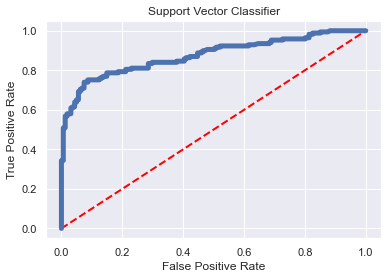

In [185]:
plt.plot([0, 1], [0, 1], 'k--', color = 'red', lw = 2)
plt.plot( fpr, tpr, color = 'b', lw = 5, label = 'ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Classifier')
plt.show()

In [186]:
# As our model is performing with approx 82 % accuracy, so curve is not sharp

In [187]:
auc_score = roc_auc_score(y_test, final_model.predict(x_test))
auc_score

# 0.7913006725715755   # accuracy based on confusion matrix showing error

0.7970708221544344

## Deploy the model 

In [188]:
import pickle

In [189]:
filename = 'titanic_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

## Conclusion 

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 136)
# print(x_test.shape)
# print(y_test.shape)
load_model = pickle.load(open('titanic_model.pkl', 'rb'))
result = load_model.score(x_test, y_test)
print(result)

# 0.8212121212121212  (Deployed model accuracy)

0.8363636363636363


In [191]:
conclusion = pd.DataFrame()  # empty dataset

In [192]:
predicted_survived = np.array(load_model.predict(x_test))
original_survived = np.array(y_test)
# Converted into array to implement in the conclusion dataframe

In [193]:
conclusion = pd.DataFrame({'Original': original_survived, 'predicted': predicted_survived}, index = range(len(original_survived)))

In [194]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
conclusion   # comparision of predicted class vs actual class

,Original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,0,0
